# Population vs Sample

Let's explore in this notebook the difference between both. 

To this end, we're going to generate a random set of 100.000 integers.

Then we will try to guess the mean of the total population using SAMPLES taken at random from the population

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
np.random.seed(12)
population = np.random.choice(1000,100000) # 100K random integer numbers between [0,1000]
print(population.shape)

population_mean = np.mean(population)
print("Population mean: {:.2f}".format(population_mean)) # puts the population mean with 2 numbers after the . into the print
print("Population mean: {}".format(population_mean))
print("Population mean rounded: ",round(population_mean,2))

(100000,)
Population mean: 499.45
Population mean: 499.44726
Population mean rounded:  499.45


In [3]:
type(population)

numpy.ndarray

*Now* let's take 5 (20) random samples of 5(1000) picks from this population and see how each sample mean changes.

Create a dictionary in which the keys have the name: 'sample_1', 'sample_2',..... and so on. As values, every key should contain the sample of 1000 random numbers from the population

In [9]:
{ 'sample_' + str(numbers): np.random.choice(population,5).tolist() for numbers in range(5)}

{'sample_0': [421, 220, 502, 807, 743],
 'sample_1': [704, 302, 970, 491, 149],
 'sample_2': [163, 15, 328, 768, 129],
 'sample_3': [495, 321, 567, 587, 769],
 'sample_4': [28, 16, 23, 621, 711]}

In [10]:
#samples = {}

samples = {'sample_' + str(i+1): np.random.choice(population, size = 5).tolist() for i in range(5)}
print(samples)

{'sample_1': [717, 50, 200, 853, 92], 'sample_2': [922, 312, 395, 240, 703], 'sample_3': [978, 750, 552, 843, 0], 'sample_4': [936, 634, 87, 722, 4], 'sample_5': [291, 635, 824, 503, 123]}


Now, compute the mean of each sample.


In [18]:
print("Population mean: {:.2f}".format(population_mean))

for key, values in samples.items():
    print("Sample {} has a mean of {}".format(key,np.mean(values)))

Population mean: 499.45
Sample sample_1 has a mean of 382.4
Sample sample_2 has a mean of 514.4
Sample sample_3 has a mean of 624.6
Sample sample_4 has a mean of 476.6
Sample sample_5 has a mean of 475.2


$\mu_{1}=x_{1}$

$\mu_{2}=\frac{x_{1}+x_{2}}{2} = \frac{x_{1}}{2}+\frac{x_{2}}{2}=\frac{\mu_{1}}{2}+\frac{x_{2}}{2}$

$\mu_{3}=\frac{x_{1}+x_{2}+x_{3}}{3}=\frac{x_{1}+x_{2}}{3}+\frac{x_{3}}{3}=\frac{2}{3}\frac{x_{1}+x_{2}}{2}+\frac{x_{3}}{3}=\frac{2}{3}\mu_{2}+\frac{x_{3}}{3}$

$\mu_{n}=\frac{(n-1)}{n}\mu_{n-1}+\frac{x_{n}}{n}=\mu_{n-1}-\frac{\mu_{n-1}}{n}+\frac{x_{n}}{n}$

Now construct a pandas dataframe with the samples:


In [36]:
df = pd.DataFrame(samples)
df

,sample_1,sample_2,sample_3,sample_4,sample_5
0,717,922,978,936,291
1,50,312,750,634,635
2,200,395,552,87,824
3,853,240,843,722,503
4,92,703,0,4,123


In [37]:
df.describe()

,sample_1,sample_2,sample_3,sample_4,sample_5
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,382.400000,514.400000,624.600000,476.600000,475.200000
std,374.670922,288.194899,382.004974,409.628856,276.561386
min,50.000000,240.000000,0.000000,4.000000,123.000000
25%,92.000000,312.000000,552.000000,87.000000,291.000000
50%,200.000000,395.000000,750.000000,634.000000,503.000000
75%,717.000000,703.000000,843.000000,722.000000,635.000000
max,853.000000,922.000000,978.000000,936.000000,824.000000


In [38]:
df.describe().loc['mean']

sample_1    382.4
sample_2    514.4
sample_3    624.6
sample_4    476.6
sample_5    475.2
Name: mean, dtype: float64

Now compute the means of each sample using "apply"

In [39]:
result = df.apply(np.mean)
print(result)

sample_1    382.4
sample_2    514.4
sample_3    624.6
sample_4    476.6
sample_5    475.2
dtype: float64


Check the type of the previous object

In [40]:
type(result)

pandas.core.series.Series

Use the previous `result` to create another dataframe in which the columns are the samples names and the row contains the mean of the sample using `transpose()`

In [41]:
means = pd.DataFrame(result).transpose()
means

,sample_1,sample_2,sample_3,sample_4,sample_5
0,382.4,514.4,624.6,476.6,475.2


Add another column to the previous dataframe called 'population_mean' which contain the mean of the population

In [43]:
means['population_mean'] = population_mean
means

,sample_1,sample_2,sample_3,sample_4,sample_5,population_mean
0,382.4,514.4,624.6,476.6,475.2,499.44726


Add another row to the dataframe with the deviations from the population mean using the following steps:

1. Compute the difference between `result` and `population_mean`
2. Create a dataframe with the previous output.
3. Transpose the resulting dataframe.
3. Concat both dataframes.

In [44]:
population_mean -result

sample_1    117.04726
sample_2    -14.95274
sample_3   -125.15274
sample_4     22.84726
sample_5     24.24726
dtype: float64

In [45]:
new_df = pd.DataFrame( population_mean - result ).transpose()
new_df

,sample_1,sample_2,sample_3,sample_4,sample_5
0,117.04726,-14.95274,-125.15274,22.84726,24.24726


Use `pd.concat` in order to add the previous dataframe as another row to `final`. Remember to reset the index.

In [47]:
final = pd.concat([means, new_df],axis=0).reset_index(drop=True)
final

,sample_1,sample_2,sample_3,sample_4,sample_5,population_mean
0,382.40000,514.40000,624.60000,476.60000,475.20000,499.44726
1,117.04726,-14.95274,-125.15274,22.84726,24.24726,NaN


Let's obtain some basic plots

<AxesSubplot:>

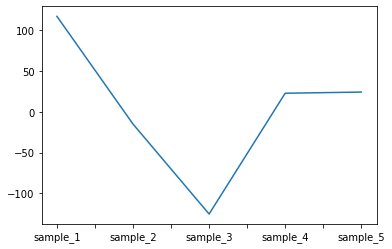

In [48]:
final.iloc[1,:-1].plot()

<AxesSubplot:>

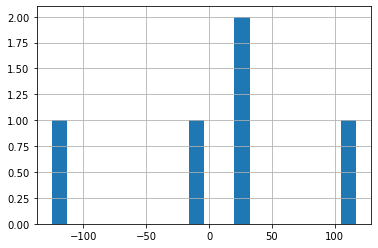

In [49]:
final.iloc[1,:-1].hist(bins=20)

In [50]:
final.iloc[1,:-1].describe()

count      5.000000
mean       4.807260
std       87.437452
min     -125.152740
25%      -14.952740
50%       22.847260
75%       24.247260
max      117.047260
Name: 1, dtype: float64

<AxesSubplot:>

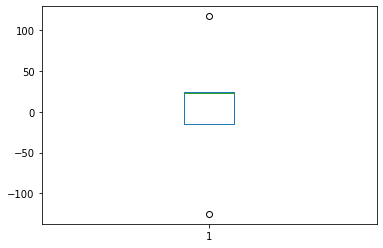

In [51]:
final.iloc[1,:-1].plot.box()
# Lower_wisker = Q1-1.5(Q3-Q1)
# Upper_wisker = Q3+1.5(Q3-Q1)

Can you obtain which sample name has the most similar mean to the population mean?

*Hint: use np.argmin()*

In [52]:
loc_min = np.argmin(np.abs(final.iloc[1,:-1]))
print("The minimum deviation is: {:.2f}".format(final.iloc[1,loc_min]))
print("wich correspondds to 'sample_{}'".format(loc_min+1))

The minimum deviation is: -14.95
wich correspondds to 'sample_2'


In [26]:
final

,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,sample_10,...,sample_12,sample_13,sample_14,sample_15,sample_16,sample_17,sample_18,sample_19,sample_20,population_mean
0,501.02700,514.76300,491.29100,497.36800,497.35100,513.33900,492.23600,504.92700,490.75400,501.32000,...,502.41100,505.14200,490.34600,491.15800,499.20400,483.49500,509.22600,499.00200,499.73800,499.44726
1,-1.57974,-15.31574,8.15626,2.07926,2.09626,-13.89174,7.21126,-5.47974,8.69326,-1.87274,...,-2.96374,-5.69474,9.10126,8.28926,0.24326,15.95226,-9.77874,0.44526,-0.29074,NaN


Now get the coresponding column name

In [27]:
final.columns[loc_min]

'sample_16'

What is the mean of the samples deviations?

In [28]:
print("The mean sample deviation is {:.2f}: ".format(np.mean(final.iloc[1,:-1])))

The mean sample deviation is -0.17: 


What is the median of the deviations from the mean?

In [29]:
print("The median sample deviation is {:.2f}: ".format(np.median(final.iloc[1,:-1])))

The median sample deviation is -0.02: 
